In [214]:

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
import numpy as np

In [4]:
# Function that returns list of bow for all movies in a given set(train/dev/test) of the given file root

from collections import defaultdict

def bow_movie(root,start,end):
    bow_per_movie = [] # list of dict where each element of bow_per_movie is bow for that movie
    for i in range(start,end):
        bow = defaultdict(float)
        string = ""
        for j in range(1,len(root[i])):
            string += root[i][j].text

        tokens =string.split()
        l_tokens = map(lambda t: t.lower(), tokens)

        for token in l_tokens:
            bow[token] += 1.0
        bow_per_movie.append(bow)
    return bow_per_movie


In [5]:
# Function that returns vocab for all movies in the training set of given file root
def vocab(bow_per_movie):
    vocab = defaultdict(float)
    
    stop_words=["a","an", "and","are","as","at","be","by","for","from","has","he", "in","is","it","its","of","on","that","the","to","was","were","will","with"]
    
    for bow in bow_per_movie:
        for key,value in bow.iteritems():
            vocab[key] += value
            
    ## removing stop words
    for key,value in vocab.items():
        if key in stop_words:
            vocab.pop(key)
            
    ## removing infrequent words with frequency less than 5
    for key,value in vocab.items():
        if value<5:
            vocab.pop(key)
    
    return vocab

In [9]:
#9999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999
# using nltk tokenizer Function that returns list of bow for all movies in a given set(train/dev/test) of the given file root

from collections import defaultdict
from nltk.tokenize import WordPunctTokenizer        # splits all punctuations into separate tokens 
word_punct_tokenizer = WordPunctTokenizer()
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
from nltk import pos_tag



def bow_movie_nltk(root,start,end):
    bow_per_movie = [] # list of dict where each element of bow_per_movie is bow for that movie
    for i in range(start,end):
        bow = defaultdict(float)
        string = ""
        for j in range(1,len(root[i])):
            string += root[i][j].text

        tokens = word_punct_tokenizer.tokenize(string)
        l_tokens = map(lambda t: t.lower(), tokens)
        
        ### Lemmatizing using wordnetlemmatizer
        l_tokens = [wnl.lemmatize(i,j[0].lower()) if j[0].lower() in ['a','n','v'] else wnl.lemmatize(i) for i,j in pos_tag(l_tokens)]
        ###
        
        for token in l_tokens:
            bow[token] += 1.0
        bow_per_movie.append(bow)
    return bow_per_movie

In [7]:
#99999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999
# using nltk stop words, Function that returns vocab for all movies in the training set of given file root

from nltk.corpus import stopwords
def vocab_nltk(bow_per_movie):
    vocab = defaultdict(float)

    stop_words=set(stopwords.words('english'))

    for bow in bow_per_movie:
        for key,value in bow.iteritems():
            vocab[key] += value
    '''
    ## removing stop words
    for key,value in vocab.items():
        if key in stop_words:
            vocab.pop(key)
    
    ## removing infrequent words with frequency less than 5
    for key,value in vocab.items():
        if value<5:
            vocab.pop(key)
    '''
    return vocab

In [18]:
bow_per_movie_train_ps = bow_movie_nltk(root_traindev_ps,0,1147)


In [ ]:
bow_per_movie_dev_ps = bow_movie_nltk(root_traindev_ps,1147,1464)

In [434]:
vocab_ps=vocab_nltk(bow_per_movie_train_ps)
fvec_train_ps = fvec(bow_per_movie_train_ps,vocab_ps)
fvec_dev_ps = fvec(bow_per_movie_dev_ps,vocab_ps)

In [435]:
print len(fvec_train_ps[0])
print len(fvec_dev_ps[0])

24861
24861


In [336]:
import pickle

f = open('fvec_train_ps_nf.txt', 'w')
pickle.dump(fvec_train_ps, f)
f.close()


In [23]:
# Function that returns feature vector for all movies in the given set(train/dev/test) of given file root
def fvec(bow_per_movie,vocab):
    fvec_per_movie = [] # list of lists where each element of fvec_per_movie is a feature vector for that movie

    for bow in bow_per_movie:
        fvec = []
        for key,value in vocab.iteritems():
            if key in bow:
                fvec.append(bow[key])
            else:
                fvec.append(0)

        fvec_per_movie.append(fvec)
    return fvec_per_movie

In [24]:
# Function that returns a list of target variables i.e. revenue for all movies in the given set(train/dev/test) of given file root
def true_rev(start,end,root):
    rev = []
    for i in range(start,end):
        rev.append(root[i][0].attrib['yvalue'])
    rev=np.array(rev).astype(np.float)
    return rev

# Predicting revenue in training set

In [8]:
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import scipy
import numpy as np

def gsv(train_x,train_y):
    parameters = {'max_depth':[5, 100]}
    clf = GridSearchCV(DecisionTreeRegressor(), parameters)
    clf.fit(train_x, train_y)
    return clf

def train(train_x,train_y):
    clf = Ridge(alpha=0.01)
    #clf=linear_model.Lasso(alpha=0.01)
    #clf=DecisionTreeRegressor(max_depth=10)
    clf.fit(train_x, train_y)
    return clf

def predict(clf, test_x): 
    return clf.predict(test_x)

def cal_mae(y_hat,y):
    return np.mean(abs(y_hat-y))



In [308]:
h = np.array([1,2])
print h
b = np.append(h,[[3,4]])
print b

[1 2]
[1 2 3 4]


In [420]:
r = gsv(fvec_train_ps,true_rev_train_ps)
print r

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)


In [15]:
import xml.etree.ElementTree as ET
tree = ET.parse('dataset\\movies-data-v1.0\\movies-data-v1.0\\perscreen-7domains-train-dev.tl.xml')
root_traindev_ps = tree.getroot()

In [ ]:
bow_per_movie_train_ps = bow_movie_nltk(root_traindev_ps,0,1147)


In [51]:
true_rev_train_ps = true_rev(0,1147,root_traindev_ps)

In [40]:
# only when changing vocab 
#####################################################################################3
vocab_ps=vocab_nltk(bow_per_movie_train_ps)


In [ ]:
fvec_train_ps = fvec(bow_per_movie_train_ps,vocab_ps)

In [41]:
len(vocab_ps)

56606

In [36]:
len(vocab_ps)

56468

# Predicting revenue in development set

In [ ]:
f= open('C:\Users\Hope\NLP 585\project\NLP_fvec\per screen\\fvec_train_ps_nfs.txt', 'r')
x= pickle.load(f)
g= open('C:\Users\Hope\NLP 585\project\NLP_fvec\per screen\\fvec_dev_ps_nfs.txt', 'r')
y= pickle.load(g)
fvec_train_ps_nfs = x
fvec_dev_ps_nfs = y


In [455]:
trained_classifier_nfsi = train(fvec_train_ps_nfsi,true_rev_train_ps)

In [456]:
#############################
# insert prediction code here
pred_rev_dev_ps = predict(trained_classifier,fvec_dev_ps_nfsi) 
mae_rev_dev_ps= cal_mae(pred_rev_dev_ps,true_rev_dev_ps)
############################

print "The mean absolute error for dev set is ", mae_rev_dev_ps

The mean absolute error for dev set is  7067.13994361


In [422]:
dtree_r = r #used nltk tokenizer,stop word,lemmatizer list to build bow and vocab with correct f_vec

# Storing models, DO NOT Run these cells

dtree_6082       # mae=6082 , used nltk tokenizer and stop word list to build bow and vocab
dtree_6179       # mae=6179 , used nltk tokenizer and stop word list to build bow and vocab
dtree_6099       # mae=6099 , used nltk tokenizer,stop word,lemmatizer list to build bow and vocab
dtree_6030       # mae=6030 , used nltk tokenizer,stop word,lemmatizer list to build bow and vocab
dtree_6028       # mae=6028 , used nltk tokenizer,stop word,lemmatizer list to build bow and vocab
dtree_r          # mae=6074 , used nltk tokenizer,stop word,lemmatizer list to build bow and vocab and grid search cv

dtree_6106       #used nltk tokenizer,stop word,lemmatizer list to build bow and vocab with correct f_vec
dtree_6037       #used nltk tokenizer,stop word,lemmatizer list to build bow and vocab with correct f_vec

In [197]:
dtree_6179 = trained_classifier       

# Predicting revenue in test set

In [1]:
import xml.etree.ElementTree as ET
tree = ET.parse('dataset\\movies-data-v1.0\\movies-data-v1.0\\perscreen-7domains-train-test.tl.xml')
root_traintest_ps = tree.getroot()

In [2]:
bow_per_movie_test_ps = bow_movie_nltk(root_traintest_ps,1147,1401)

# insert prediction code here
# pred_rev_test_ps =
#########################

NameError: name 'bow_movie_nltk' is not defined

In [42]:
fvec_test_ps = fvec(bow_per_movie_test_ps,vocab_ps)

#########################

In [49]:
true_rev_test_ps = true_rev(1147,1401,root_traintest_ps)

In [43]:
import pickle

f = open('NLP_fvec\\NFSI\\fvec_test_ps_nf.txt', 'w')
pickle.dump(fvec_test_ps, f)
f.close()


In [45]:
f= open('C:\Users\Hope\NLP 585\project\NLP_fvec\NFSI\\fvec_train_ps_nfs.txt', 'r')
fvec_train_ps_nfs = pickle.load(f)
f.close()
f= open('C:\Users\Hope\NLP 585\project\NLP_fvec\NFSI\\fvec_train_ps_nfsi.txt', 'r')
fvec_train_ps_nfsi = pickle.load(f)
f.close()
f= open('C:\Users\Hope\NLP 585\project\NLP_fvec\NFSI\\fvec_train_ps_nf.txt', 'r')
fvec_train_ps_nf = pickle.load(f)
f.close()

In [48]:
f= open('C:\Users\Hope\NLP 585\project\NLP_fvec\NFSI\\fvec_test_ps_nfs.txt', 'r')
fvec_test_ps_nfs = pickle.load(f)
f.close()
f= open('C:\Users\Hope\NLP 585\project\NLP_fvec\NFSI\\fvec_test_ps_nfsi.txt', 'r')
fvec_test_ps_nfsi = pickle.load(f)
f.close()
f= open('C:\Users\Hope\NLP 585\project\NLP_fvec\NFSI\\fvec_test_ps_nf.txt', 'r')
fvec_test_ps_nf = pickle.load(f)
f.close()

In [47]:
from sklearn.neural_network import MLPRegressor
def mpl(train_x,train_y,test_x):
    clf = MLPRegressor(hidden_layer_sizes=(100, 100,100,100),alpha=0.1)
    clf.fit(train_x, train_y) 
    return clf.predict(test_x)
def cal_mae(y_hat,y):
    return np.mean(abs(y_hat-y))

#  Neural MAEs for test set for per screen revenue

In [52]:
y_hat= mpl(fvec_train_ps_nfsi,true_rev_train_ps,fvec_test_ps_nfsi)

mae= cal_mae(true_rev_test_ps,y_hat)

print "The mean absolute error for test set nfsi is ", mae

The mean absolute error for test set nfsi is  6488.7894407


In [53]:
y_hat= mpl(fvec_train_ps_nfs,true_rev_train_ps,fvec_test_ps_nfs)

mae= cal_mae(true_rev_test_ps,y_hat)

print "The mean absolute error for test set nfs is ", mae

The mean absolute error for test set nfs is  6454.07767839


C:\Users\Hope\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [54]:
y_hat= mpl(fvec_train_ps_nf,true_rev_train_ps,fvec_test_ps_nf)

mae= cal_mae(true_rev_test_ps,y_hat)

print "The mean absolute error for test set nf is ", mae

The mean absolute error for test set nf is  6432.81568768


# Try any trained classifier here

In [46]:
#############################
# insert prediction code here
pred_rev_test_ps = predict(trained_classifier,fvec_test_ps_nfsi) 
mae_rev_dev_ps= cal_mae(pred_rev_dev_ps,true_rev_dev_ps)
############################

print "The mean absolute error for test set nfsi is ", mae_rev_dev_ps

#############################
# insert prediction code here
pred_rev_test_ps = predict(trained_classifier,fvec_test_ps_nfs) 
mae_rev_dev_ps= cal_mae(pred_rev_dev_ps,true_rev_dev_ps)
############################

print "The mean absolute error for test set nfs is ", mae_rev_dev_ps

#############################
# insert prediction code here
pred_rev_test_ps = predict(trained_classifier,fvec_test_ps_nf) 
mae_rev_dev_ps= cal_mae(pred_rev_dev_ps,true_rev_dev_ps)
############################

print "The mean absolute error for test set nf is ", mae_rev_dev_ps

NameError: name 'trained_classifier' is not defined

# Histogram showing depiction of training data

In [9]:
mean = np.mean(true_rev_train_ps)
std= np.std(true_rev_train_ps)
print mean
print std


8447.1656012
12343.2975493


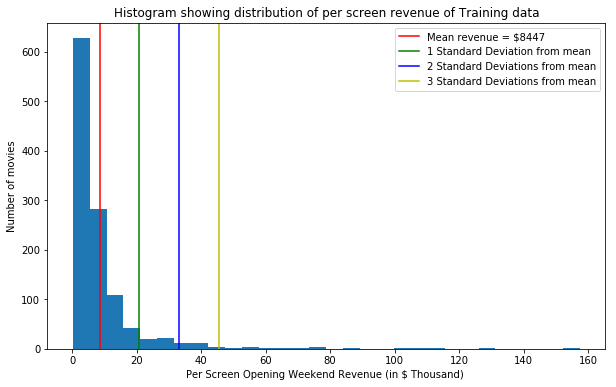

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
plt.hist(true_rev_train_ps/10 **3,30)
plt.xlabel("Per Screen Opening Weekend Revenue (in $ Thousand) ")
plt.ylabel("Number of movies")
plt.axvline(x=mean/10**3 , c='r' , label ='Mean revenue = $8447')
plt.axvline(x=(mean+std)/10**3, c='g', label = '1 Standard Deviation from mean')
plt.axvline(x=(mean+2*std)/10**3, c='b', label = '2 Standard Deviations from mean')
plt.axvline(x=(mean+3*std)/10**3, c='y', label = '3 Standard Deviations from mean')
plt.title('Histogram showing distribution of per screen revenue of Training data')
plt.legend()
plt.show()